<a href="https://colab.research.google.com/github/NazHub1993/Data_Analysis_Projects/blob/main/ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [235]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [199]:
# df=pd.read_csv("test_scores.csv")
# x=np.array(df['math'],dtype=float)
# y=np.array(df['cs'],dtype=float)

In [200]:
# def compute_cost(x,y,m,b):
#   n=len(x);
#   y_pred=m*x+b;
#   return (1/n)*sum((y-y_pred)**2)


In [201]:
# def gradient_descent(x,y,learning_rate=0.00001):
#   m=0
#   b=0
#   n=len(x)
#   prev_cost=float("inf")

#   for i in range(1000):
#     y_pred=m*x+b;

#     dm=-(2/n)*sum(x*(y-y_pred))
#     db=-(2/n)*sum(y-y_pred)


#     m=m-learning_rate*dm
#     b=b-learning_rate*db

#     cost=compute_cost(x,y,m,b)

#     if math.isclose(prev_cost, cost, rel_tol=1e-20):
#             print(f"Stopped at iteration {i}")
#             break

#     prev_cost=cost

#   return m,b,cost




In [202]:
# m, b, cost = gradient_descent(x, y, learning_rate=0.00001)

# print("Gradient Descent Results")
# print("m =", m)
# print("b =", b)
# print("final cost =", cost)

#One-hot encoding , Dummy Variables, LabelEncoding

In [203]:
df=pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


#First let's create dummy variable using pandas

In [204]:
dummies=pd.get_dummies(df.town)
dummies
# This is a pandas dataframe containing dummy variables

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


#Let's concat dummy variables with my original datafarame

In [205]:
merged=pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


#After dropping unnecessary columns to avoid multicollinearity

In [206]:
merged = merged.drop(['town','west windsor'],axis='columns')
merged

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


#Let's create X and Y

In [207]:
x=merged.drop(['price'],axis='columns')
x

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [208]:
y=merged['price']
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000
5,585000
6,615000
7,650000
8,710000
9,575000


#Time for linear Regression model

In [209]:
model=LinearRegression()
model.fit(x,y);

In [210]:
new_data = pd.DataFrame([[3400,0,0]], columns=['area','monroe township','robinsville'])
model.predict(new_data)

array([681241.66845839])

#Let's go for One Hot Encoder

In [211]:
dfo=df;
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [212]:
X=dfo.drop(['price'],axis='columns')
Y=dfo['price']
X.head()

,town,area
0,monroe township,2600
1,monroe township,3000
2,monroe township,3200
3,monroe township,3600
4,monroe township,4000


In [213]:
Y.head()

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [214]:
X=X.values
Y=Y.values


In [215]:
ct=ColumnTransformer([('anything_you_like',OneHotEncoder(drop='first'),[0])],remainder='passthrough')
X_encoded=ct.fit_transform(X)
print(X_encoded)


[[0.0 0.0 2600]
 [0.0 0.0 3000]
 [0.0 0.0 3200]
 [0.0 0.0 3600]
 [0.0 0.0 4000]
 [0.0 1.0 2600]
 [0.0 1.0 2800]
 [0.0 1.0 3300]
 [0.0 1.0 3600]
 [1.0 0.0 2600]
 [1.0 0.0 2900]
 [1.0 0.0 3100]
 [1.0 0.0 3600]]


In [216]:
model.fit(X_encoded,Y)

LinearRegression()

In [217]:
model.predict([[0,0,3400]])

array([641227.69296925])

#Let's do the exercise

In [218]:
dfc=pd.read_csv('carprices.csv')
dfc.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [219]:
X_dfc=dfc.drop(['Sell Price($)'],axis='columns').values
Y_dfc=dfc['Sell Price($)'].values


In [220]:
print(X_dfc)

[['BMW X5' 69000 6]
 ['BMW X5' 35000 3]
 ['BMW X5' 57000 5]
 ['BMW X5' 22500 2]
 ['BMW X5' 46000 4]
 ['Audi A5' 59000 5]
 ['Audi A5' 52000 5]
 ['Audi A5' 72000 6]
 ['Audi A5' 91000 8]
 ['Mercedez Benz C class' 67000 6]
 ['Mercedez Benz C class' 83000 7]
 ['Mercedez Benz C class' 79000 7]
 ['Mercedez Benz C class' 59000 5]]


In [221]:
preprocessor=ColumnTransformer([('model',OneHotEncoder(drop='first'),[0])],remainder='passthrough')
X_dfc_encoded=preprocessor.fit_transform(X_dfc)
print(X_dfc_encoded)

[[1.0 0.0 69000 6]
 [1.0 0.0 35000 3]
 [1.0 0.0 57000 5]
 [1.0 0.0 22500 2]
 [1.0 0.0 46000 4]
 [0.0 0.0 59000 5]
 [0.0 0.0 52000 5]
 [0.0 0.0 72000 6]
 [0.0 0.0 91000 8]
 [0.0 1.0 67000 6]
 [0.0 1.0 83000 7]
 [0.0 1.0 79000 7]
 [0.0 1.0 59000 5]]


In [222]:
model.fit(X_dfc_encoded,Y_dfc)

LinearRegression()

In [223]:
model.predict([[0,1,45000,4]])

array([36991.31721062])

In [224]:
model.predict([[0,0,86000,7]])

array([15365.40972059])

In [227]:
model.score(X_dfc_encoded,Y_dfc)

0.9417050937281082

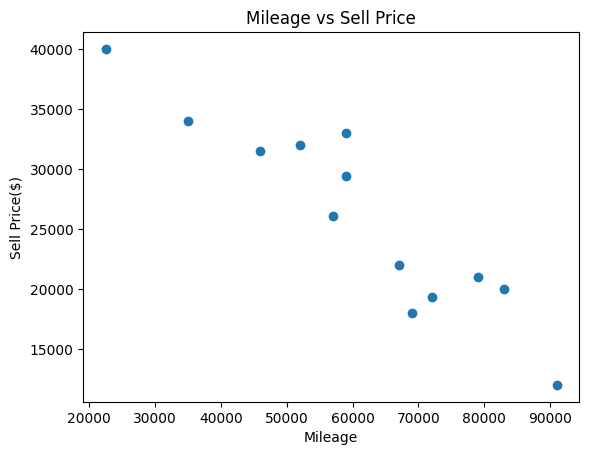

In [231]:
plt.scatter(dfc['Mileage'], dfc['Sell Price($)'])
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.title('Mileage vs Sell Price')
plt.show()


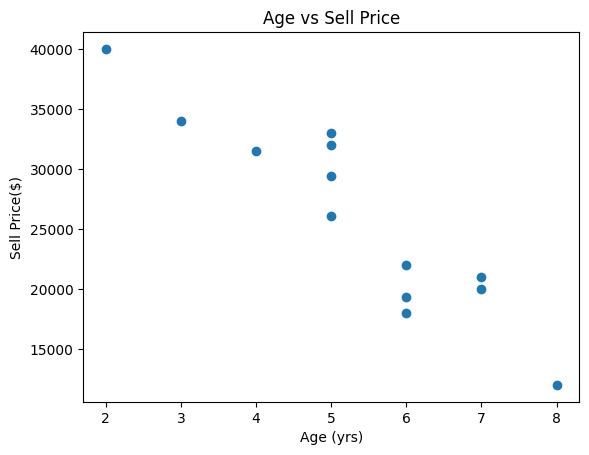

In [233]:
plt.scatter(dfc['Age(yrs)'], dfc['Sell Price($)'])
plt.xlabel('Age (yrs)')
plt.ylabel('Sell Price($)')
plt.title('Age vs Sell Price')
plt.show()

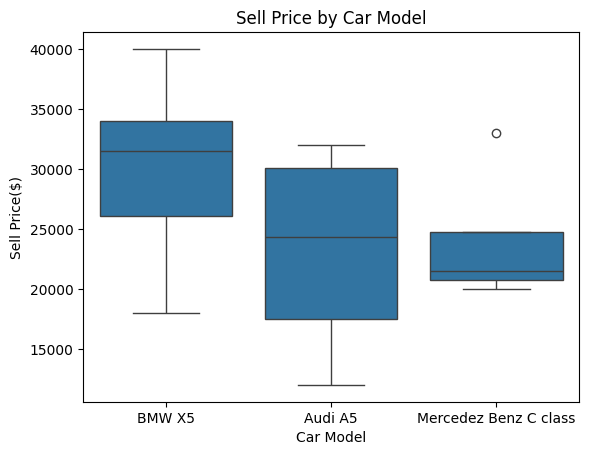

In [236]:
sns.boxplot(x='Car Model', y='Sell Price($)', data=dfc)
plt.title('Sell Price by Car Model')
plt.show()